## Loan Amount Prediction

In [84]:
# IMPORT LIBRARIES


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("train.csv")

In [87]:
# DATA DESCRIPTION


In [88]:
# Variable            Description

# Loan_ID------------>Unique Loan ID
# Gender------------->Male/ Female
# Married------------>Applicant married (Y/N)
# Dependents--------->Number of dependents
# Education---------->Applicant Education (Graduate/ Under Graduate)
# Self_Employed------>Self employed (Y/N)
# ApplicantIncome---->Applicant income
# CoapplicantIncome-->Coapplicant income
# LoanAmount--------->Loan amount in thousands
# Loan_Amount_Term--->Term of loan in months
# Credit_History----->credit history meets guidelines
# Property_Area------>Urban/ Semi Urban/ Rural
# Loan_Status-------->Loan approved (Y/N)



In [89]:
df.shape


(614, 13)

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [92]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [93]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [94]:
df.describe(include='O')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [95]:
# Let's drop the Loan_ID column as it is not necessary for our model
df.drop('Loan_ID', axis=1, inplace=True)



In [96]:
# Let's check Duplicated rows
df.duplicated().any()

False

In [97]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [98]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [99]:
import warnings
warnings.filterwarnings('ignore')

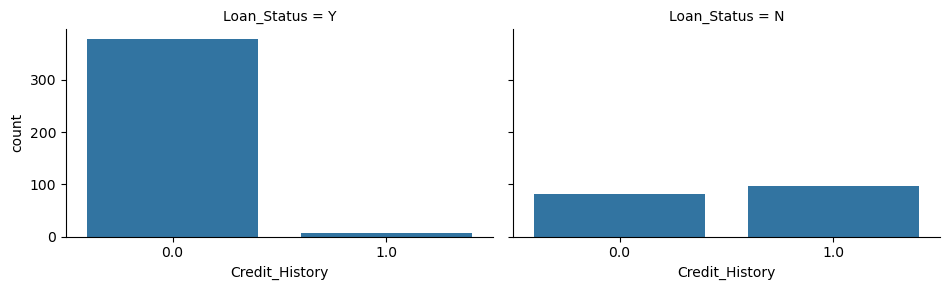

In [100]:
# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status',  aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

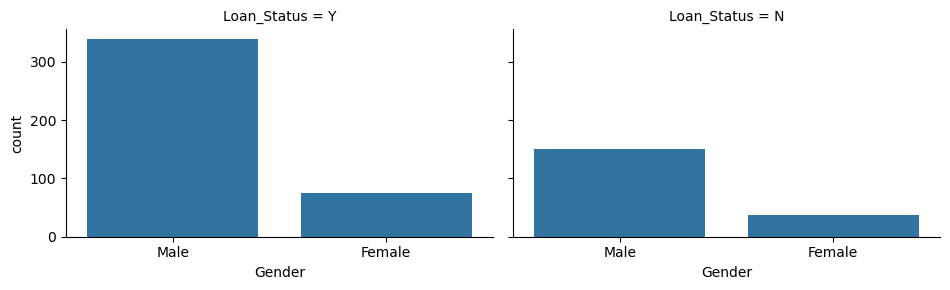

In [101]:
# Gender

grid = sns.FacetGrid(df,col='Loan_Status',  aspect=1.6)
grid.map(sns.countplot, 'Gender');

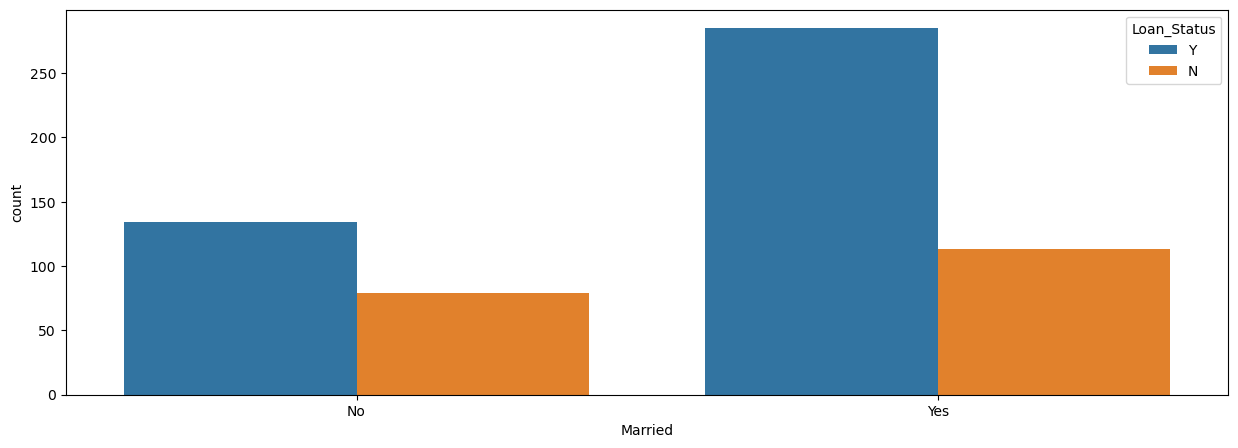

In [102]:
# Married

plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);

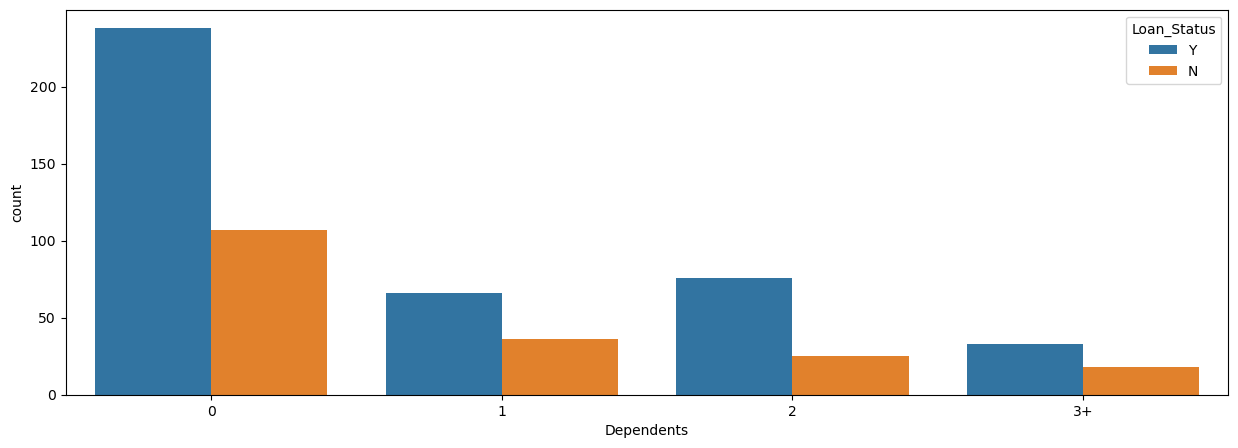

In [103]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);


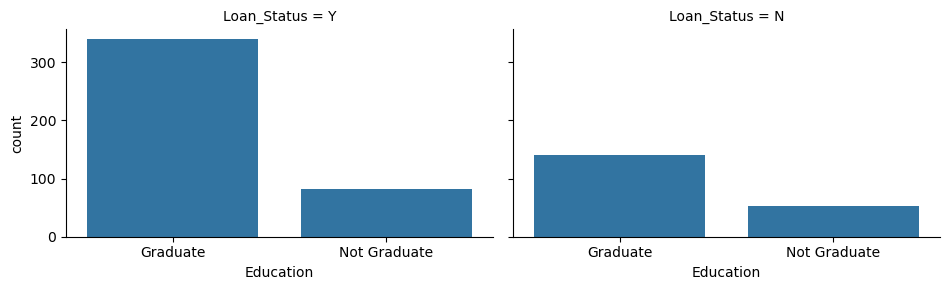

In [104]:
# Education

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Education');

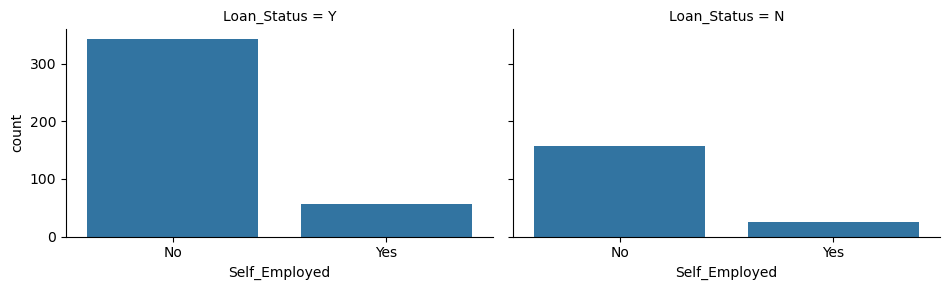

In [105]:
# Self_Employed

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

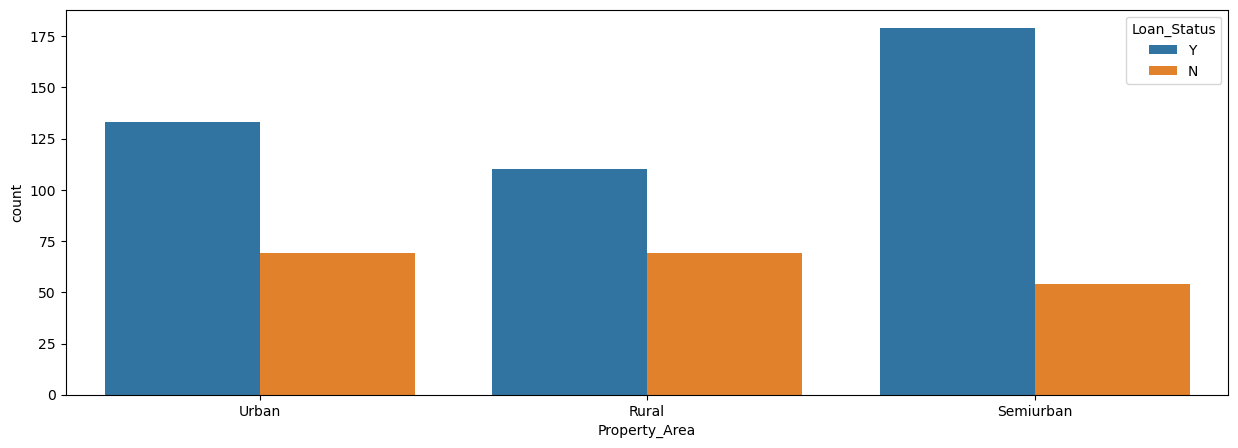

In [106]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

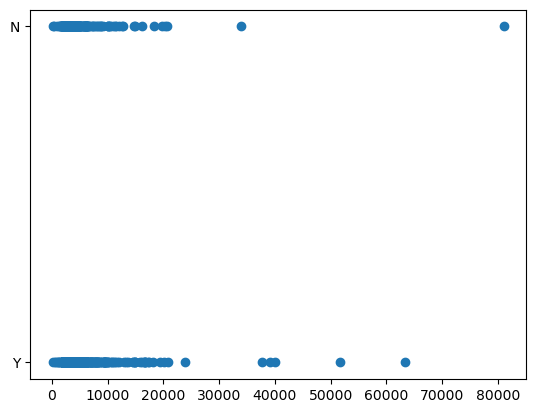

In [107]:
# ApplicantIncome

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

In [166]:
df.groupby("Loan_Status").median()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3812.5,1239.5,127.5,360.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3833.5,268.0,132.5,360.0


In [109]:
# HANDLING MISSING DATA

In [110]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [112]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [113]:
cat_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [114]:
num_data.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [115]:
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [116]:
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

False

In [117]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [118]:
target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [119]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [120]:
target.head()


0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [121]:
cat_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [122]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [123]:
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [124]:
# TRAINING THE DATA

In [125]:
X = pd.concat([cat_data, num_data], axis=1)
y = target 

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)


print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [127]:
# Let's train using four models
# LogisticRegression, KneighboursClassifier, SVC 
# and Decision tree classifier

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [129]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [130]:


def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.827
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 9.249
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 11.158
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.900
  acc: 0.809
------------------------------


In [131]:
X_train.shape


(491, 11)

In [132]:

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0]) 
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.894048
 rec     0.422500
 f1      0.562733
 loss    7.046902
 acc     0.804490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.921282
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.525142
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [133]:
# Hyperparameter tuning

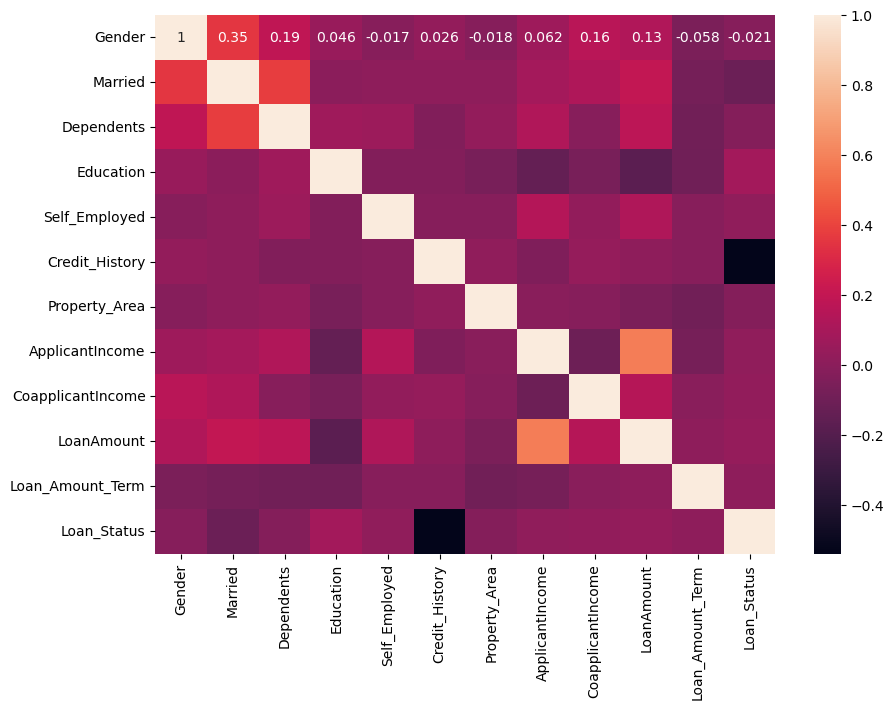

In [134]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [135]:
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,0,0,0,1,2,2995.0,0.0,60.0,360.0
26,1,1,0,0,0,1,1,2799.0,2253.0,122.0,360.0
394,1,1,2,0,0,1,2,3100.0,1400.0,113.0,360.0
584,1,1,1,0,0,0,0,2787.0,1917.0,146.0,360.0
86,1,1,2,1,0,1,1,3333.0,2000.0,99.0,360.0


In [136]:
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,0,0,0,1,2,2995.0,0.0,60.0,360.0
26,1,1,0,0,0,1,1,2799.0,2253.0,122.0,360.0
394,1,1,2,0,0,1,2,3100.0,1400.0,113.0,360.0
584,1,1,1,0,0,0,0,2787.0,1917.0,146.0,360.0
86,1,1,2,1,0,1,1,3333.0,2000.0,99.0,360.0


In [137]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

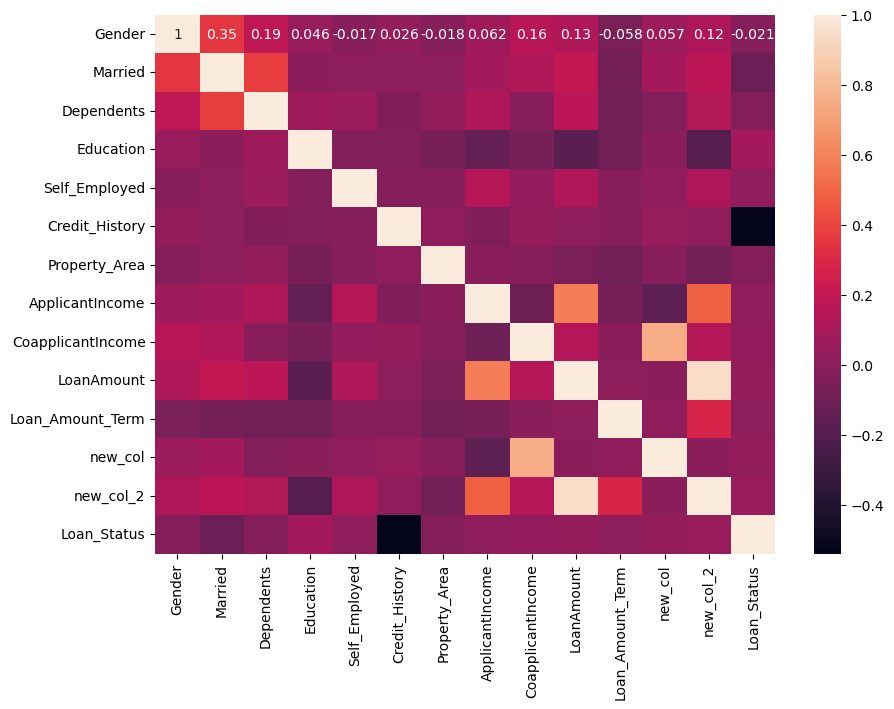

In [138]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [139]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [140]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.304467
 acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.305317
 rec      0.162500
 f1       0.211087
 loss    13.515634
 acc      0.625020
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.304467
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


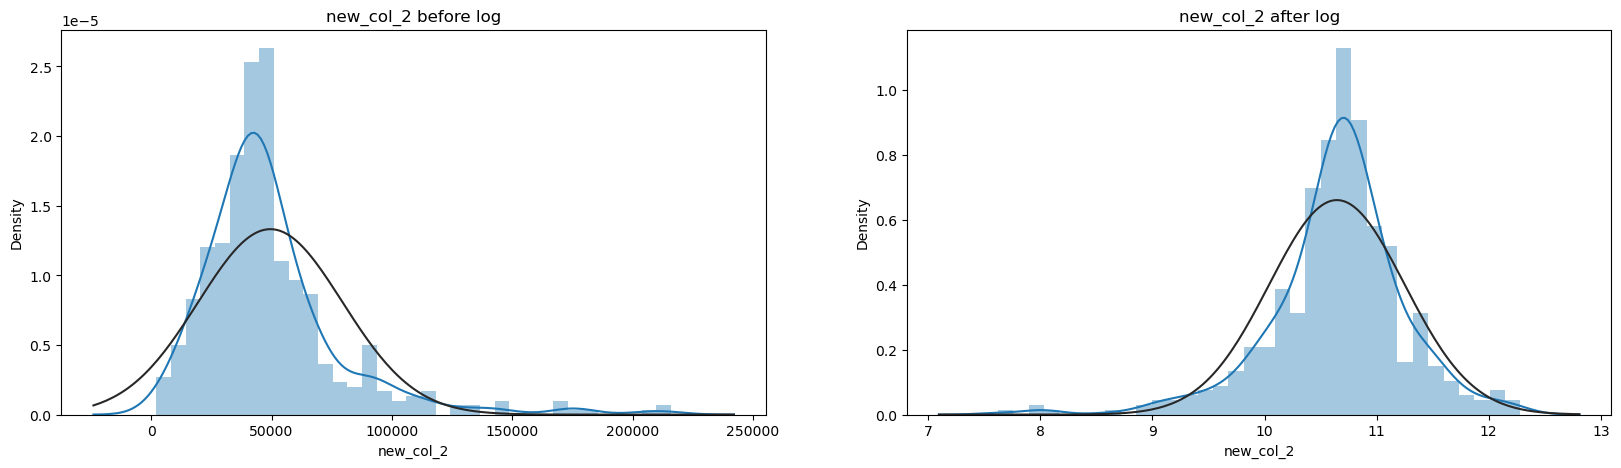

In [141]:
from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logarithm of all the values

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [142]:
# EVALUATION OF THE MODELS

In [143]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.899048
 rec     0.429167
 f1      0.569764
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.685278
 rec     0.336667
 f1      0.439734
 loss    9.246300
 acc     0.743469
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.811548
 rec     0.311667
 f1      0.444833
 loss    8.151750
 acc     0.773837
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [144]:
print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
new_col
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: count, Length: 270, dtype: int64
--------------------------------------------------

after:
new_col
1.0    269
0.0    222
Name: count, dtype: int64


In [145]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.910714
 rec     0.422500
 f1      0.562606
 loss    6.973344
 acc     0.806531
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.719762
 rec     0.298333
 f1      0.406231
 loss    9.469918
 acc     0.737265
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.819048
 rec     0.324167
 f1      0.458747
 loss    8.003162
 acc     0.777959
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [146]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

Gender
1    398
0     93
Name: count, dtype: int64
------------------------------------------------
Married
1    315
0    176
Name: count, dtype: int64
------------------------------------------------
Dependents
0    292
2     85
1     78
3     36
Name: count, dtype: int64
------------------------------------------------
Education
0    382
1    109
Name: count, dtype: int64
------------------------------------------------
Self_Employed
0    428
1     63
Name: count, dtype: int64
------------------------------------------------
Credit_History
1    421
0     70
Name: count, dtype: int64
------------------------------------------------
Property_Area
1    179
2    170
0    142
Name: count, dtype: int64
------------------------------------------------
new_col
1.0    269
0.0    222
Name: count, dtype: int64
------------------------------------------------
new_col_2
10.673596    18
10.586584    13
10.961278    11
10.491274    11
10.738134     9
             ..
11.643954     1
10.595634     1


In [147]:
models

{'LogisticRegression': LogisticRegression(random_state=42),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'SVC': SVC(random_state=42),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)}

In [148]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 415 to 240
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    int32  
 1   Married            491 non-null    int32  
 2   Dependents         491 non-null    int32  
 3   Education          491 non-null    int32  
 4   Self_Employed      491 non-null    int32  
 5   Credit_History     491 non-null    int64  
 6   Property_Area      491 non-null    int32  
 7   ApplicantIncome    491 non-null    float64
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         491 non-null    float64
 10  Loan_Amount_Term   491 non-null    float64
 11  new_col            491 non-null    float64
 12  new_col_2          491 non-null    float64
 13  Loan_Status        491 non-null    int64  
dtypes: float64(6), int32(6), int64(2)
memory usage: 46.0 KB


In [149]:
y_train


415    0
26     0
394    0
584    1
86     0
      ..
386    0
487    1
466    1
285    0
240    0
Name: Loan_Status, Length: 491, dtype: int64

In [150]:
skf

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [151]:
# HANDLING OUTLIERS

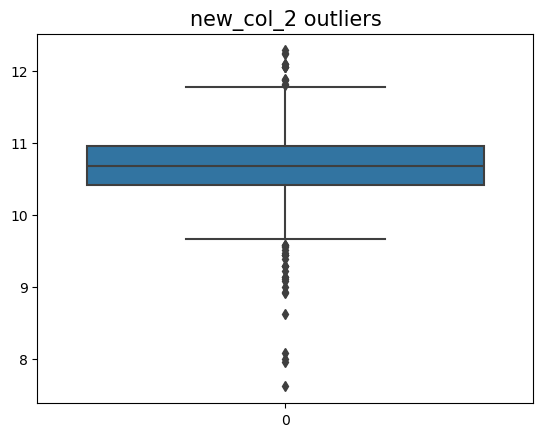

In [152]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [153]:
threshold = 1.5
            
new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.8179046195970114
Lower: 9.598103480688962
Upper: 11.779182466280993
Nubers of Outliers: 39
outliers:[12.092679958175083, 8.930626469173578, 7.620705086838262, 12.254862809699606, 7.965545573129992, 9.574983485564092, 9.392661928770137, 9.578311275656766, 9.587406005562649, 9.112948025967533, 8.006367567650246, 9.144200569471638, 9.287301413112312, 9.441452092939569, 9.287301413112312, 12.059890135352092, 8.626944055375356, 9.51044496442652, 11.81569317484005, 9.441452092939569, 8.922658299524402, 9.287301413112312, 11.889991098556695, 12.059890135352092, 12.059890135352092, 12.231740392278752, 9.469622969906265, 9.137769679141348, 11.799607037088427, 9.084777149000837, 9.21830854162536, 8.99961934066053, 8.083328608786376, 12.283033686666302, 9.549665677579801, 11.877568578558138, 11.877568578558138, 12.100712129872347, 9.441452092939569]

len X_train before dropping the outliers 491
le

In [154]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

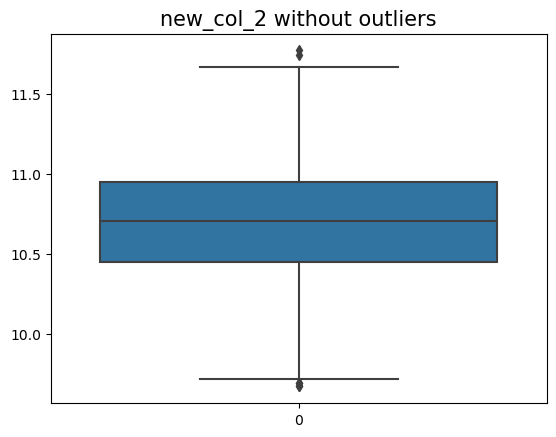

In [155]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

In [156]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.703771
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.748929
 rec     0.335714
 f1      0.452126
 loss    8.784552
 acc     0.756280
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.772364
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.623674
 acc     0.816232
Name: 0, dtype: float64
------------------------------


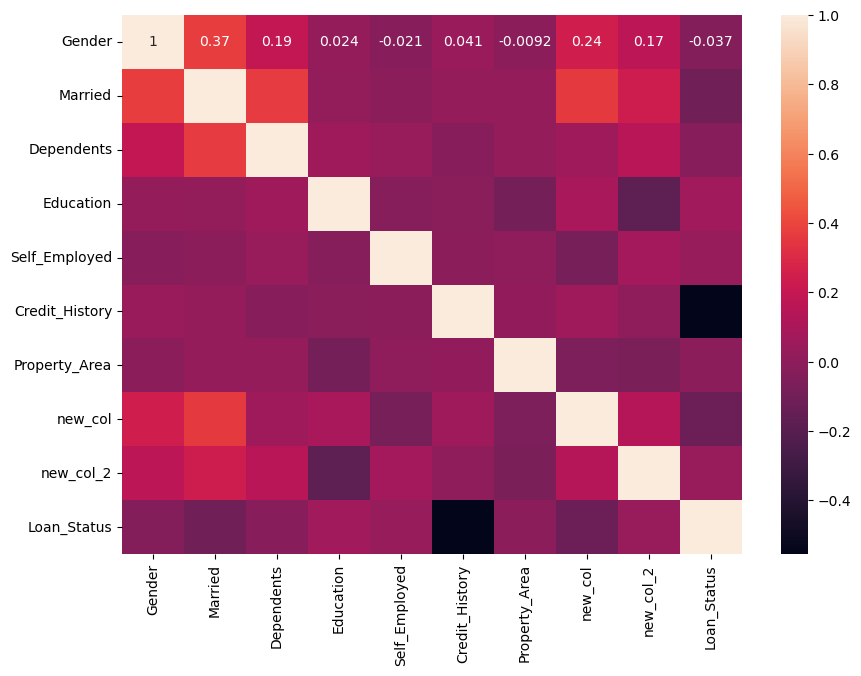

In [157]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [158]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.703771
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.748929
 rec     0.335714
 f1      0.452126
 loss    8.784552
 acc     0.756280
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.772364
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.623674
 acc     0.816232
Name: 0, dtype: float64
------------------------------


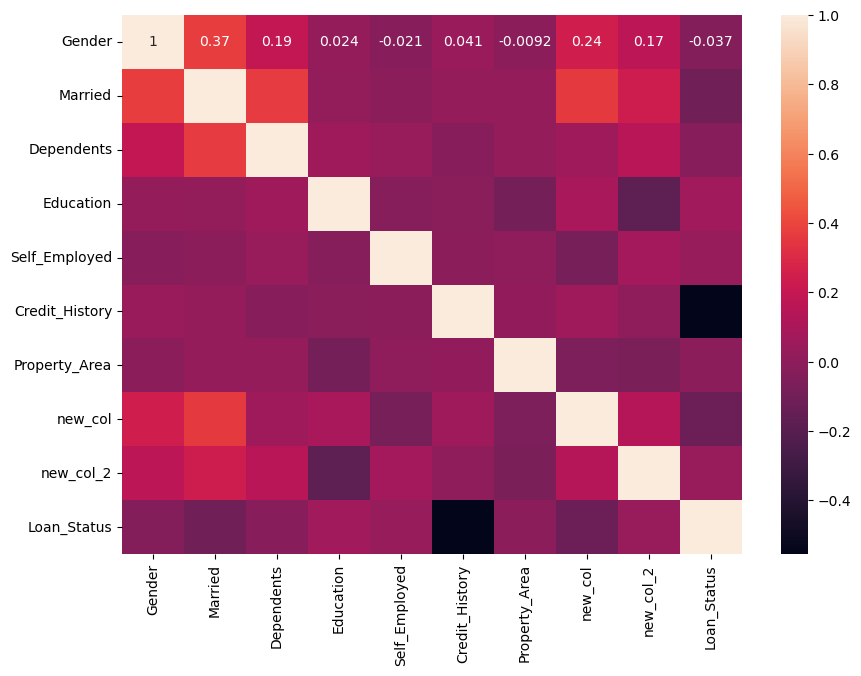

In [159]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [160]:
X_test.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
182,1,1,0,0,0,1,1,4600.0,0.0,73.0,180.0
440,1,0,0,0,0,1,1,3660.0,5064.0,187.0,360.0
276,1,1,0,0,0,1,1,3993.0,3274.0,207.0,360.0
533,1,0,1,0,0,1,1,11250.0,0.0,196.0,360.0
504,1,1,0,1,0,1,1,3814.0,1483.0,124.0,300.0


In [161]:
X_test_new = X_test.copy()


In [162]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

In [163]:
X_test_new.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,new_col,new_col_2
182,1,1,0,0,0,1,1,0.0,9.483416
440,1,0,0,0,0,1,1,1.0,11.117213
276,1,1,0,0,0,1,1,1.0,11.218823
533,1,0,1,0,0,1,1,0.0,11.164219
504,1,1,0,1,0,1,1,1.0,10.524064


In [164]:
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,new_col,new_col_2
415,0,0,0,0,0,1,2,0.0,9.980449
26,1,1,0,0,0,1,1,1.0,10.690125
394,1,1,2,0,0,1,2,1.0,10.613492
584,1,1,1,0,0,0,0,1.0,10.869711
86,1,1,2,1,0,1,1,1.0,10.481224


In [165]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.850
  rec: 0.447
  f1: 0.586
  loss: 7.033
  acc: 0.805
----------------------------------------
KNeighborsClassifier:
  pre: 0.615
  rec: 0.421
  f1: 0.500
  loss: 9.377
  acc: 0.740
----------------------------------------
SVC:
  pre: 0.867
  rec: 0.342
  f1: 0.491
  loss: 7.912
  acc: 0.780
----------------------------------------
DecisionTreeClassifier:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.740
  acc: 0.813
----------------------------------------
